In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import argparse
from ns3gym import ns3env
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

__author__ = "Fabio Steven Tovar Ramos"
__version__ = "1.0"
__email__ = "fstovarr@unal.edu.co"
__title__ = "Cognitive Agent evaluation"

# Data exploration

In [2]:
df = pd.read_csv("data/data.csv", index_col=0, )
df = df[df['reward']==1].reset_index()
df.drop('index', axis=1, inplace=True)
df

,time,radio,reward,distance,power
0,0,0.499766,1.0,0.292595,27
1,2,0.947882,1.0,0.280822,11
2,5,1.895581,1.0,0.761587,11
3,7,2.191366,1.0,1.511366,27
4,9,2.746923,1.0,1.324630,17
...,...,...,...,...,...
1107,44,2.987945,1.0,0.072911,11
1108,45,2.949200,1.0,0.703738,11
1109,47,2.962684,1.0,2.198653,13
1110,48,3.174980,1.0,1.960625,14


In [3]:
df.describe()

,time,radio,reward,distance,power
count,1112.000000,1112.000000,1112.0,1112.000000,1112.000000
mean,24.959532,2.741855,1.0,1.908818,20.825540
std,14.379490,0.661811,0.0,1.001416,8.198931
min,0.000000,0.417234,1.0,0.003907,10.000000
25%,13.000000,2.547950,1.0,1.185962,13.000000
50%,25.000000,2.866986,1.0,1.786633,20.000000
75%,38.000000,3.175110,1.0,2.553610,27.000000
max,49.000000,3.910150,1.0,4.661030,48.000000


/home/fabiostovarr/anaconda3/envs/tf/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/fabiostovarr/anaconda3/envs/tf/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/fabiostovarr/anaconda3/envs/tf/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


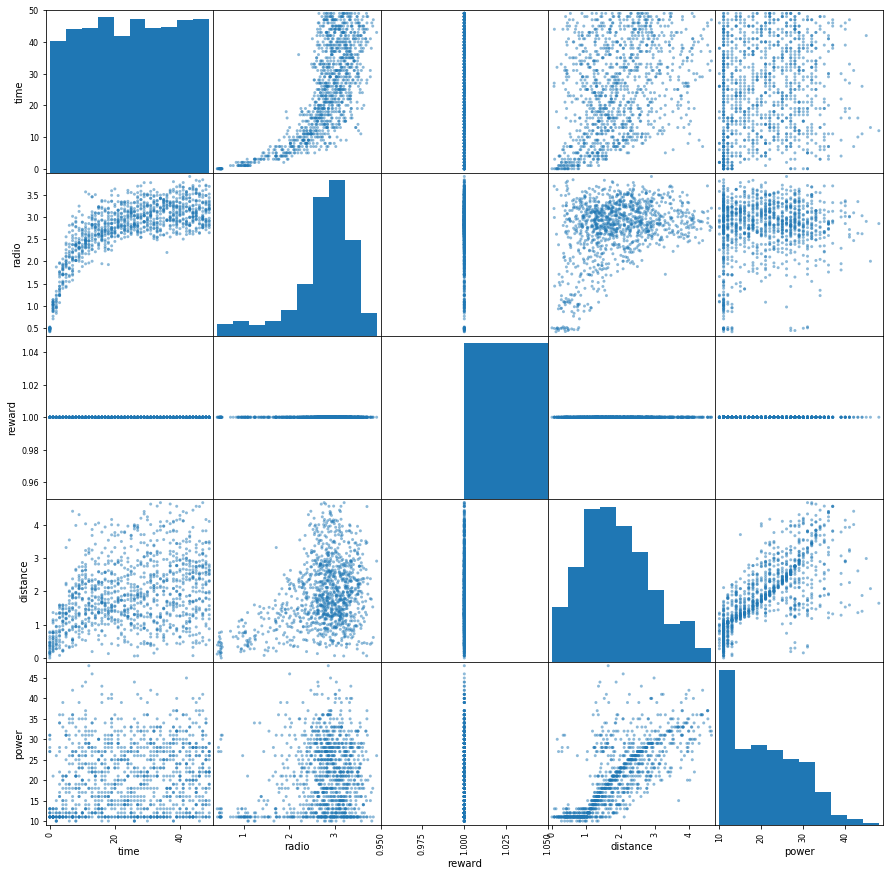

In [4]:
fig = scatter_matrix(df, figsize=(15, 15))
plt.savefig("plots/scatter.png", bbox_inches='tight', dpi=100)

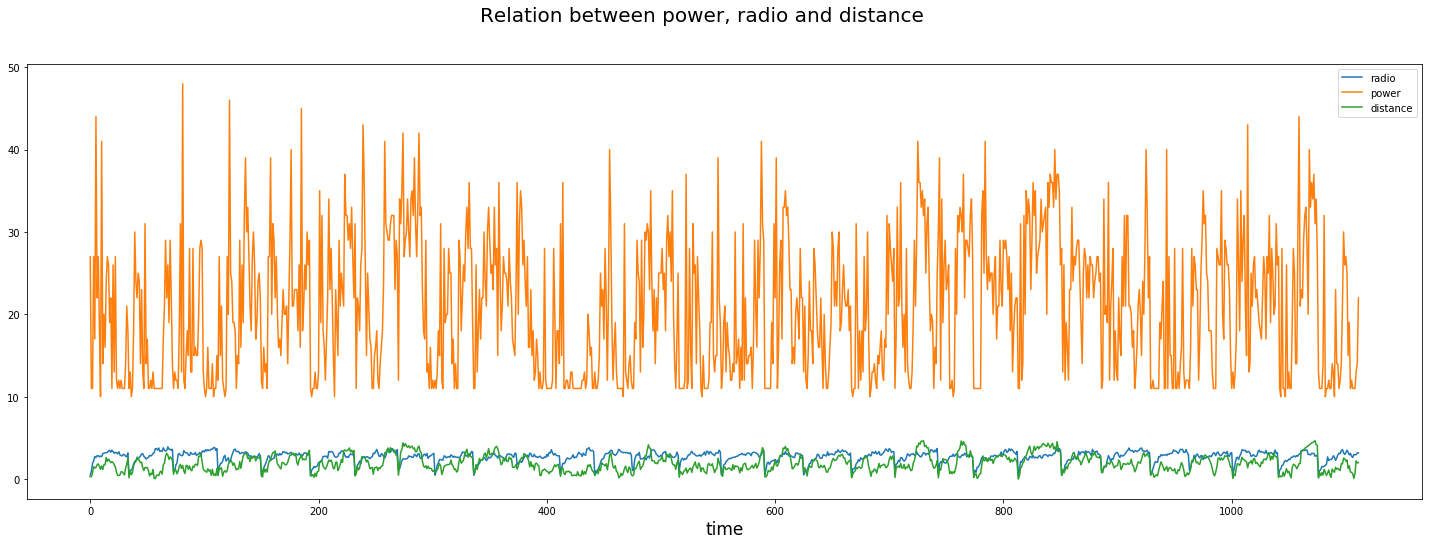

In [5]:
df[['radio', 'power', 'distance']].plot(figsize=(25, 8))
plt.suptitle("Relation between power, radio and distance", fontsize=20)
plt.xlabel("time", fontsize=17)
plt.savefig("plots/features.png", dpi=100, bbox_inches='tight')

# Cognitive agent training

In [6]:
from tensorflow.keras.utils import plot_model
from agents.cognitive_agent import CognitiveAgent

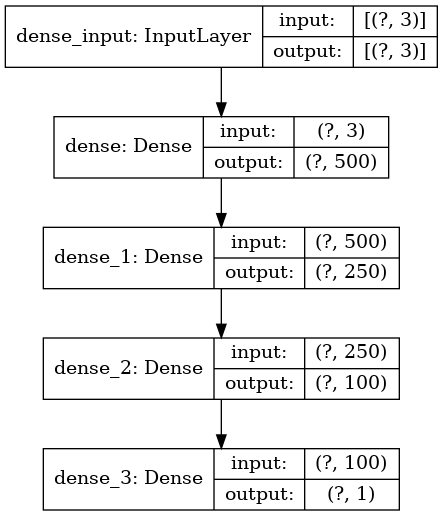

In [7]:
agent = CognitiveAgent(3)
plot_model(agent.model, to_file="plots/agent_architecture.png", show_shapes=True)

In [8]:
features = ['distance', 'radio', 'time']

In [9]:
X = df[features].to_numpy()
Y = df['power'].to_numpy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=10)

In [11]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
y_scaler = StandardScaler().fit(y_train.reshape(-1,1))
y_train = y_scaler.transform(y_train.reshape(-1,1))
y_test = y_scaler.transform(y_test.reshape(-1,1))

In [13]:
history = agent.learn(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
28/28 [==============================] - 0s 9ms/step - loss: 0.7922 - mae: 0.7464 - mse: 0.7922 - val_loss: 0.5956 - val_mae: 0.6533 - val_mse: 0.5956
Epoch 2/100
28/28 [==============================] - 0s 4ms/step - loss: 0.5593 - mae: 0.5976 - mse: 0.5593 - val_loss: 0.4731 - val_mae: 0.5422 - val_mse: 0.4731
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4710 - mae: 0.5185 - mse: 0.4710 - val_loss: 0.4266 - val_mae: 0.4831 - val_mse: 0.4266
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4381 - mae: 0.4760 - mse: 0.4381 - val_loss: 0.4120 - val_mae: 0.4566 - val_mse: 0.4120
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4242 - mae: 0.4570 - mse: 0.4242 - val_loss: 0.4160 - val_mae: 0.4337 - val_mse: 0.4160
Epoch 6/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4181 - mae: 0.4451 - mse: 0.4181 - val_loss: 0.4038 - val_mae: 0.4373 - val_mse: 0.4038
Epoch 7/100
28/28 [===

# Agent performance evaluation

In [14]:
import numpy as np
from sklearn.metrics import accuracy_score

In [15]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
37,0.396424,0.427929,0.396424,0.411431,0.437153,0.411431,37
38,0.396084,0.429749,0.396084,0.411010,0.436078,0.411010,38
39,0.393700,0.432042,0.393700,0.425026,0.432099,0.425026,39
40,0.396616,0.426137,0.396616,0.409452,0.439438,0.409452,40
41,0.395223,0.426814,0.395223,0.407608,0.442816,0.407608,41


In [16]:
hist.describe()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,0.417659,0.447725,0.417659,0.415500,0.445800,0.415500,20.500000
std,0.065234,0.055584,0.065234,0.030886,0.037659,0.030886,12.267844
min,0.393700,0.425532,0.393700,0.399864,0.425370,0.399864,0.000000
25%,0.397241,0.430617,0.397241,0.404123,0.433596,0.404123,10.250000
50%,0.401921,0.433061,0.401921,0.407821,0.436267,0.407821,20.500000
75%,0.406703,0.435109,0.406703,0.415482,0.441231,0.415482,30.750000
max,0.792222,0.746371,0.792222,0.595558,0.653317,0.595558,41.000000


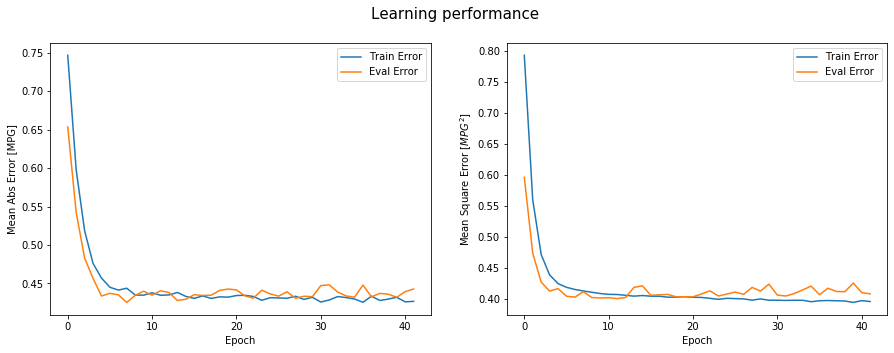

In [28]:
fig, axis = plt.subplots(1, 2, figsize=(15,5))

axis[0].set_xlabel('Epoch')
axis[0].set_ylabel('Mean Abs Error [MPG]')
axis[0].plot(hist["epoch"], hist["mae"], label='Train Error')
axis[0].plot(hist["epoch"], hist["val_mae"], label = 'Eval Error')
axis[0].legend()

axis[1].set_xlabel('Epoch')
axis[1].set_ylabel('Mean Square Error [$MPG^2$]')
axis[1].plot(hist["epoch"], hist["mse"], label='Train Error')
axis[1].plot(hist["epoch"], hist["val_mse"], label = 'Eval Error')
axis[1].legend()

fig.suptitle("Learning performance", fontsize=15)

plt.savefig("plots/learning_rates.png", dpi=100, bbox_inches='tight')

In [18]:
evaluation = agent.model.evaluate(scaler.transform(X_test), y_scaler.transform(y_test), batch_size=128)
evaluation

2/2 [==============================] - 0s 2ms/step - loss: 2.5194 - mae: 1.4387 - mse: 2.5194


[2.5193982124328613, 1.4386615753173828, 2.5193982124328613]

In [19]:
y_pred = np.round(y_scaler.inverse_transform(agent.model.predict(X_test)))
y_test = y_scaler.inverse_transform(y_test)
X_test = scaler.inverse_transform(X_test)

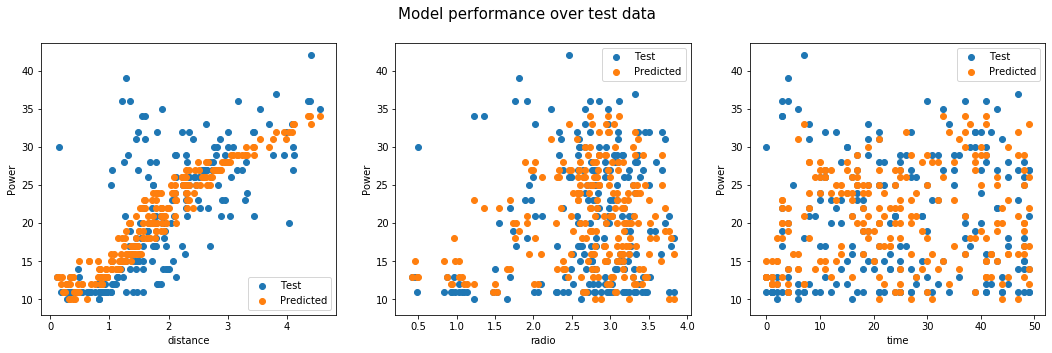

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(18,5))
for idx, axis in enumerate(ax):
    axis.set_ylabel("Power")
    axis.set_xlabel(features[idx])
    axis.scatter(X_test[:,idx], y_test, label="Test")
    axis.scatter(X_test[:,idx], y_pred, label="Predicted")
    axis.legend()
fig.suptitle("Model performance over test data", fontsize=15)
plt.savefig("plots/model_behavior.png", dpi=100, bbox_inches="tight")

# Save learned model and scaler

In [21]:
agent.scalers = [scaler, y_scaler]
agent.save_state()

In [22]:
#agent.load_state()
agent2 = CognitiveAgent(3)
agent2.load_state()

In [23]:
prediction = agent2.get_action(X_test[0, :])

In [24]:
print(prediction)
print(y_test[0,:][0])

16.0
14.0
